In [ ]:
import yfinance as yf
import pandas as pd

# -----------------------------
# 1. Get NVDA earnings (Reported EPS)
# -----------------------------
nvda = yf.Ticker("NVDA")
earnings = nvda.get_earnings_dates(limit=40)

eps = earnings["Reported EPS"].dropna().copy()

idx = pd.to_datetime(eps.index)
idx = idx.tz_convert(None)
idx = idx.normalize()
eps.index = idx

eps = eps[eps.index >= "2019-01-01"]

eps_df = eps.to_frame(name="EPS").reset_index()
eps_df = eps_df.rename(columns={"index": "Date"})
eps_df["Date"] = pd.to_datetime(eps_df["Earnings Date"])

# -----------------------------
# 2. Get NVDA daily prices (trading days only)
# -----------------------------
prices = yf.download(
    "NVDA",
    start="2019-01-01",
    end="2026-01-01",
    progress=False
)

# Flatten MultiIndex columns if present (Price / Close etc.)
if isinstance(prices.columns, pd.MultiIndex):
    prices.columns = prices.columns.get_level_values(-1)

prices = prices.reset_index()
prices["Date"] = pd.to_datetime(prices["Date"])

# -----------------------------
# 3. Attach EPS to each trading day (merge_asof)
# -----------------------------
prices_sorted = prices.sort_values("Date")
eps_sorted = eps_df.sort_values("Date")

combined = pd.merge_asof(
    prices_sorted,
    eps_sorted,
    on="Date",
    direction="backward"   # use latest EPS reported on or before that day
)

combined = combined.set_index("Date")

combined["EPS"] = combined["EPS"].bfill()

eps_df = pd.DataFrame(combined['EPS']).reset_index()

eps_df


/var/folders/l3/hscjby01301g7b5xn2h0q1qw0000gn/T/ipykernel_7946/2703509041.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(


,Date,EPS
0,2019-01-02,0.02
1,2019-01-03,0.02
2,2019-01-04,0.02
3,2019-01-07,0.02
4,2019-01-08,0.02
...,...,...
1723,2025-11-07,1.05
1724,2025-11-10,1.05
1725,2025-11-11,1.05
1726,2025-11-12,1.05


In [87]:
# Basic descriptive statistics
eps_df["EPS"].describe()


count    1728.000000
mean        0.260752
std         0.306884
min         0.020000
25%         0.050000
50%         0.090000
75%         0.520000
max         1.050000
Name: EPS, dtype: float64

In [103]:
import matplotlib.pyplot as plt

break_date = pd.Timestamp("2022-10-01")   # start of AI boom period
before_df = eps_df[eps_df["Date"] < break_date]
after_df  = eps_df[eps_df["Date"] >= break_date]

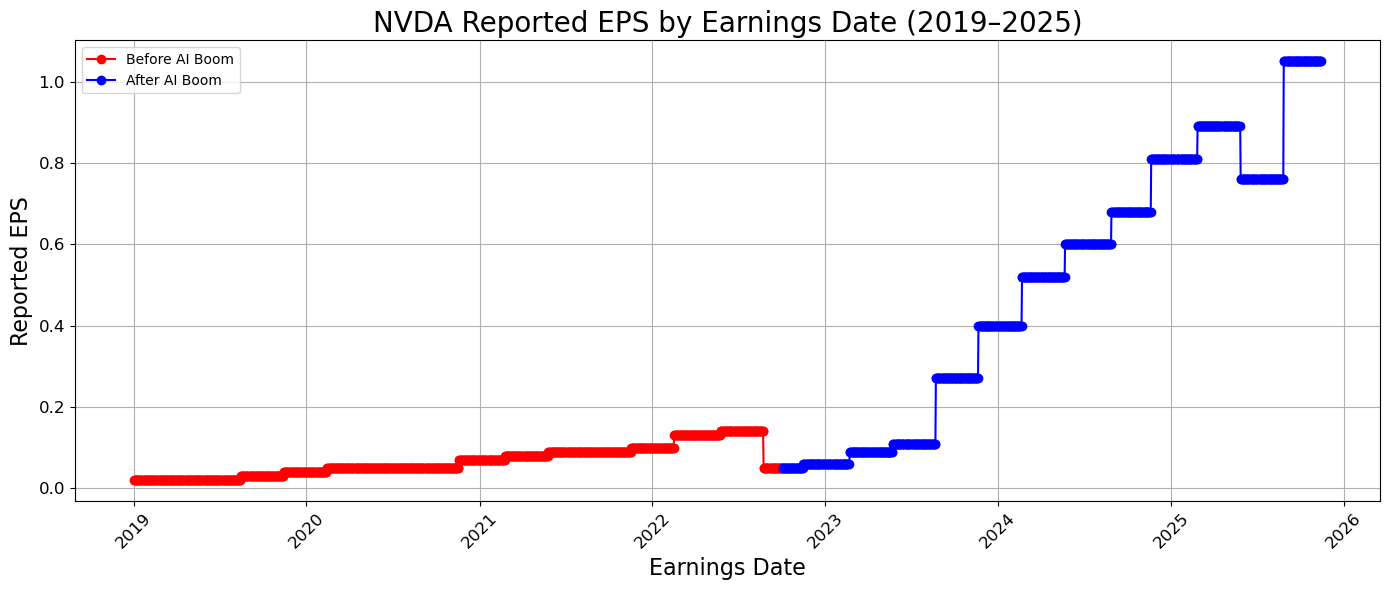

In [105]:
plt.figure(figsize=(14,6))

# Before AI boom (2019–2022 Q3)
plt.plot(before_df["Date"], before_df["EPS"],
         marker="o", color="red", label="Before AI Boom")

# After AI boom (2022 Q4–2025)
plt.plot(after_df["Date"], after_df["EPS"],
         marker="o", color="blue", label="After AI Boom")

plt.title("NVDA Reported EPS by Earnings Date (2019–2025)", fontsize=20)
plt.xlabel("Earnings Date", fontsize=16)
plt.ylabel("Reported EPS", fontsize=16)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



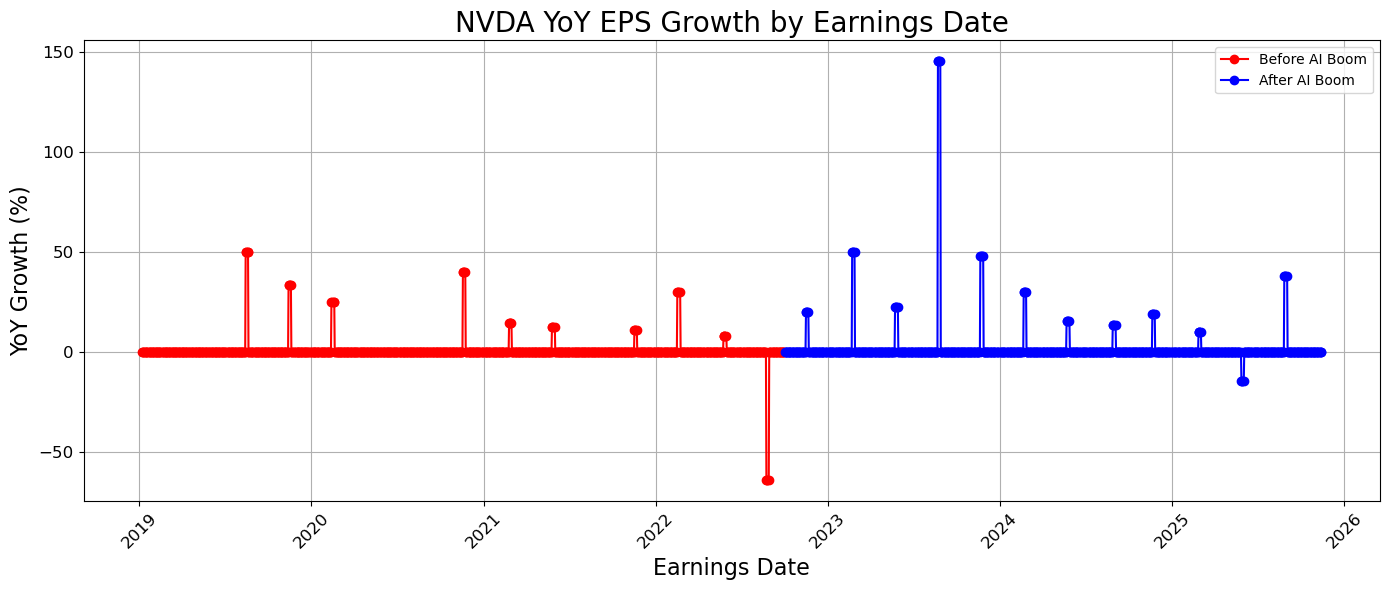

In [107]:
# Plot Year-over-Year growth by date
eps_df = eps_df.sort_values("Date")
eps_df["YoY_Growth_%"] = eps_df["EPS"].pct_change(4) * 100
plt.figure(figsize=(14,6))

plt.plot(before_df["Date"], before_df["YoY_Growth_%"],
         marker="o", color="red", label="Before AI Boom")

plt.plot(after_df["Date"], after_df["YoY_Growth_%"],
         marker="o", color="blue", label="After AI Boom")

plt.title("NVDA YoY EPS Growth by Earnings Date", fontsize=20)
plt.xlabel("Earnings Date", fontsize=16)
plt.ylabel("YoY Growth (%)", fontsize=16)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



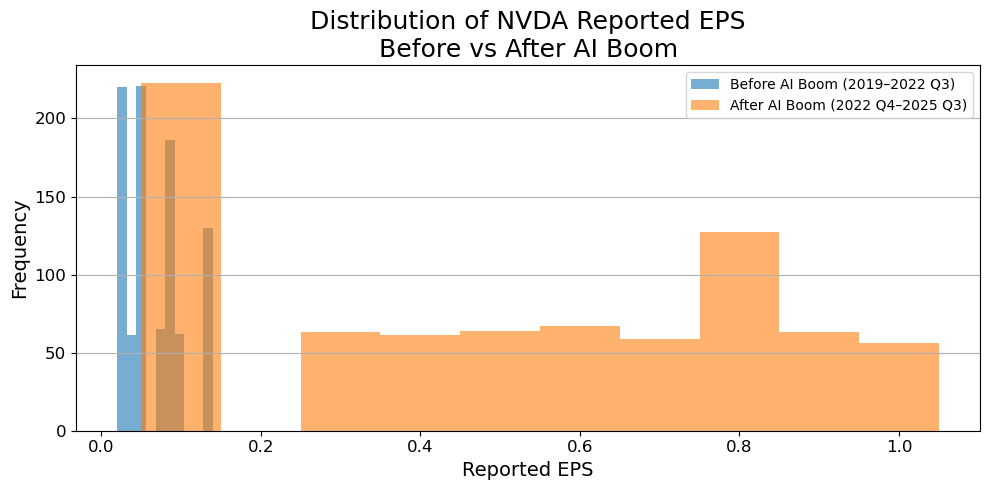

In [ ]:
plt.figure(figsize=(10,5))

# Before AI boom: 2019 – 2022 Q3
plt.hist(
    before_df["EPS"],
    bins=10,
    alpha=0.6,
    label="Before AI Boom (2019-2022 Q3)"
)

# After AI boom: 2022 Q4 – 2025 Q3
plt.hist(
    after_df["EPS"],
    bins=10,
    alpha=0.6,
    label="After AI Boom (2022 Q4-2025 Q3)"
)

plt.title("Distribution of NVDA Reported EPS\nBefore vs After AI Boom", fontsize=18)
plt.xlabel("Reported EPS", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y")
plt.legend()
plt.tight_layout()
plt.show()



In [96]:
# Conclusion

# NVDA’s EPS-by-date analysis from 2019–2025 shows a dramatic acceleration beginning 
# in late 2022 and exploding in 2023–2024, consistent with NVIDIA’s AI and data-center demand surge. 
# EPS increases are not smooth — they appear in large discrete jumps on specific report dates, 
# reflecting major revenue and margin expansions rather than gradual growth. 
# YoY growth becomes extremely elevated after 2023, surpassing normal semiconductor cycles and 
# showing unprecedented profitability. Overall, NVDA’s earnings trajectory is nonlinear, 
# highly event-driven, and strongly tied to AI-related demand shocks.